<a href="https://colab.research.google.com/github/Mahiyan-Khan-Abir/Heart-Failure-Prediction-with-ANN/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Full dataset**

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Heart/heart_failure_clinical_records_dataset.csv")
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

**Separating parameters with binary values**

In [18]:
df.iloc[:, [1,3,5,9,10,12]]

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


**Creating dataframe from the separated parameters with binary values**

In [24]:
df_cls = pd.DataFrame({'anaemia': df['anaemia'],'diabetes': df['diabetes'],'high_blood_pressure': df['high_blood_pressure'],'sex': df['sex'],'smoking': df['smoking'],'DEATH_EVENT': df['DEATH_EVENT']},)
df_cls

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,1,1,0,1
1,0,0,0,1,0,1
2,0,0,0,1,1,1
3,1,0,0,1,0,1
4,1,1,0,0,0,1
...,...,...,...,...,...,...
294,0,1,1,1,1,0
295,0,0,0,0,0,0
296,0,1,0,0,0,0
297,0,0,0,1,1,0


**Finding whather there is any missing value in the tuples**

In [25]:
#Finding missing data
df_cls = pd.DataFrame(df_cls)
df_cls.isnull()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
294,False,False,False,False,False,False
295,False,False,False,False,False,False
296,False,False,False,False,False,False
297,False,False,False,False,False,False


**Finding correlation among dependent and independent variables**

In [26]:
#Correlation
import matplotlib.pyplot as plt
corr = df_cls.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
anaemia,1.000000,-0.012729,0.038182,-0.094769,-0.107290,0.066270
diabetes,-0.012729,1.000000,-0.012732,-0.157730,-0.147173,-0.001943
high_blood_pressure,0.038182,-0.012732,1.000000,-0.104615,-0.055711,0.079351
sex,-0.094769,-0.157730,-0.104615,1.000000,0.445892,-0.004316
smoking,-0.107290,-0.147173,-0.055711,0.445892,1.000000,-0.012623
DEATH_EVENT,0.066270,-0.001943,0.079351,-0.004316,-0.012623,1.000000


**Assigning the dependent and independent variables**

In [45]:
x= df_cls.iloc[:, [0,1,2,4]].values  
y= df_cls.iloc[:, 5].values  
#print(x)


**Splitting the dataset into training and test set**

In [46]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

**feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

1D CNN


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.regularizers import l2

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(Flatten())
model.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.1)))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 100, batch_size=16, verbose=1, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))


Epoch 1/100
14/14 [==============================] - 2s 34ms/step - loss: 1.4315 - accuracy: 0.6920 - val_loss: 1.3838 - val_accuracy: 0.6400
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 1.3170 - accuracy: 0.6920 - val_loss: 1.2847 - val_accuracy: 0.6400
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 1.2153 - accuracy: 0.6920 - val_loss: 1.1991 - val_accuracy: 0.6400
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 1.1294 - accuracy: 0.6920 - val_loss: 1.1268 - val_accuracy: 0.6400
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 1.0537 - accuracy: 0.6920 - val_loss: 1.0644 - val_accuracy: 0.6400
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.9923 - accuracy: 0.6920 - val_loss: 1.0113 - val_accuracy: 0.6400
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.9386 - accuracy: 0.6920 - val_loss: 0.9646 - val_accuracy: 0.6400
Epoch 8/100


In [55]:
train_results_CNN = model.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)
test_results_CNN = model.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)

# extract the loss and accuracy values
train_loss_CNN = train_results_CNN[0]
train_acc_CNN = train_results_CNN[1]
test_loss_CNN = test_results_CNN[0]
test_acc_CNN = test_results_CNN[1]

print("Train accuracy:", train_acc_CNN)
print("Test accuracy:", test_acc_CNN)

Train accuracy: 0.6919642686843872
Test accuracy: 0.6399999856948853


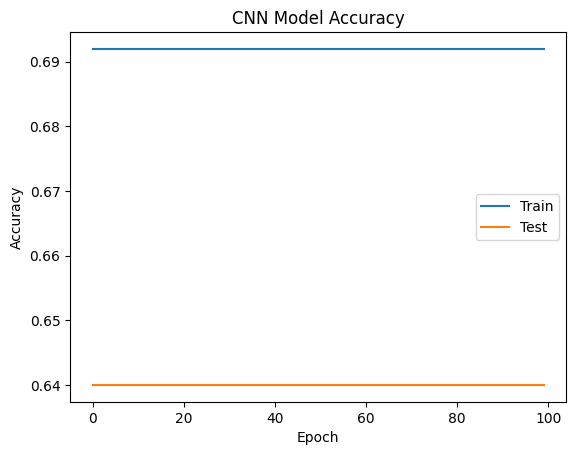

In [56]:
train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_CNN, label='Train')
plt.plot(test_acc_CNN, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

**RNN**

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# define the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
model_rnn.add(Dense(1, activation='sigmoid'))

# compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')
# train the model
history_rnn = model_rnn.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs= 65, batch_size=32, validation_data=(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test))




Epoch 1/65
7/7 [==============================] - 3s 102ms/step - loss: 0.6877 - accuracy: 0.5580 - val_loss: 0.6832 - val_accuracy: 0.6133
Epoch 2/65
7/7 [==============================] - 0s 12ms/step - loss: 0.6765 - accuracy: 0.6339 - val_loss: 0.6760 - val_accuracy: 0.6667
Epoch 3/65
7/7 [==============================] - 0s 14ms/step - loss: 0.6658 - accuracy: 0.6652 - val_loss: 0.6679 - val_accuracy: 0.6667
Epoch 4/65
7/7 [==============================] - 0s 13ms/step - loss: 0.6502 - accuracy: 0.6652 - val_loss: 0.6605 - val_accuracy: 0.6267
Epoch 5/65
7/7 [==============================] - 0s 13ms/step - loss: 0.6350 - accuracy: 0.6875 - val_loss: 0.6562 - val_accuracy: 0.6267
Epoch 6/65
7/7 [==============================] - 0s 11ms/step - loss: 0.6212 - accuracy: 0.6875 - val_loss: 0.6593 - val_accuracy: 0.6400
Epoch 7/65
7/7 [==============================] - 0s 11ms/step - loss: 0.6140 - accuracy: 0.6920 - val_loss: 0.6710 - val_accuracy: 0.6400
Epoch 8/65
7/7 [==========

In [100]:
# evaluate the model
train_acc_rnn = model_rnn.evaluate(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, verbose=0)[1]
test_acc_rnn = model_rnn.evaluate(x_test.reshape(x_test.shape[0], x_test.shape[1], 1), y_test, verbose=0)[1]
print("Train accuracy:", train_acc_rnn)
print("Test accuracy :", test_acc_rnn)

Train accuracy: 0.6919642686843872
Test accuracy : 0.6399999856948853


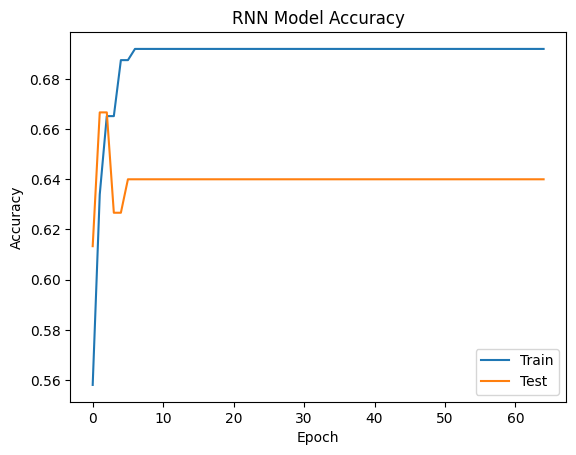

In [101]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_rnn, label='Train')
plt.plot(test_acc_rnn, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()
plt.show()

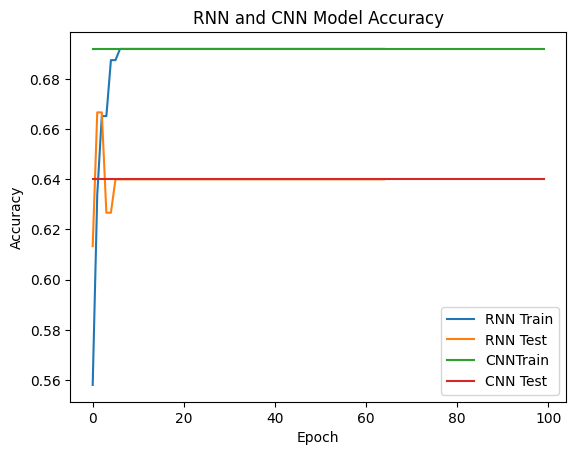

In [102]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']

train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(train_acc_rnn, label='RNN Train')
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(train_acc_CNN, label='CNNTrain')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN and CNN Model Accuracy')
plt.legend()
plt.show()


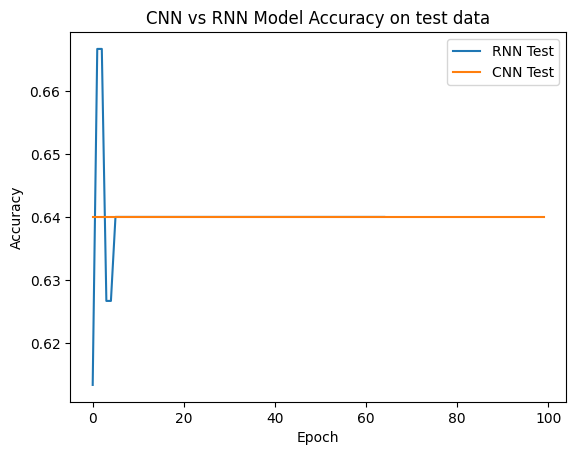

In [107]:
test_acc_rnn = history_rnn.history['val_accuracy']
test_acc_CNN = history.history['val_accuracy']

# plot the train and test accuracy
plt.plot(test_acc_rnn, label='RNN Test')
plt.plot(test_acc_CNN, label='CNN Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN vs RNN Model Accuracy on test data')
plt.legend()

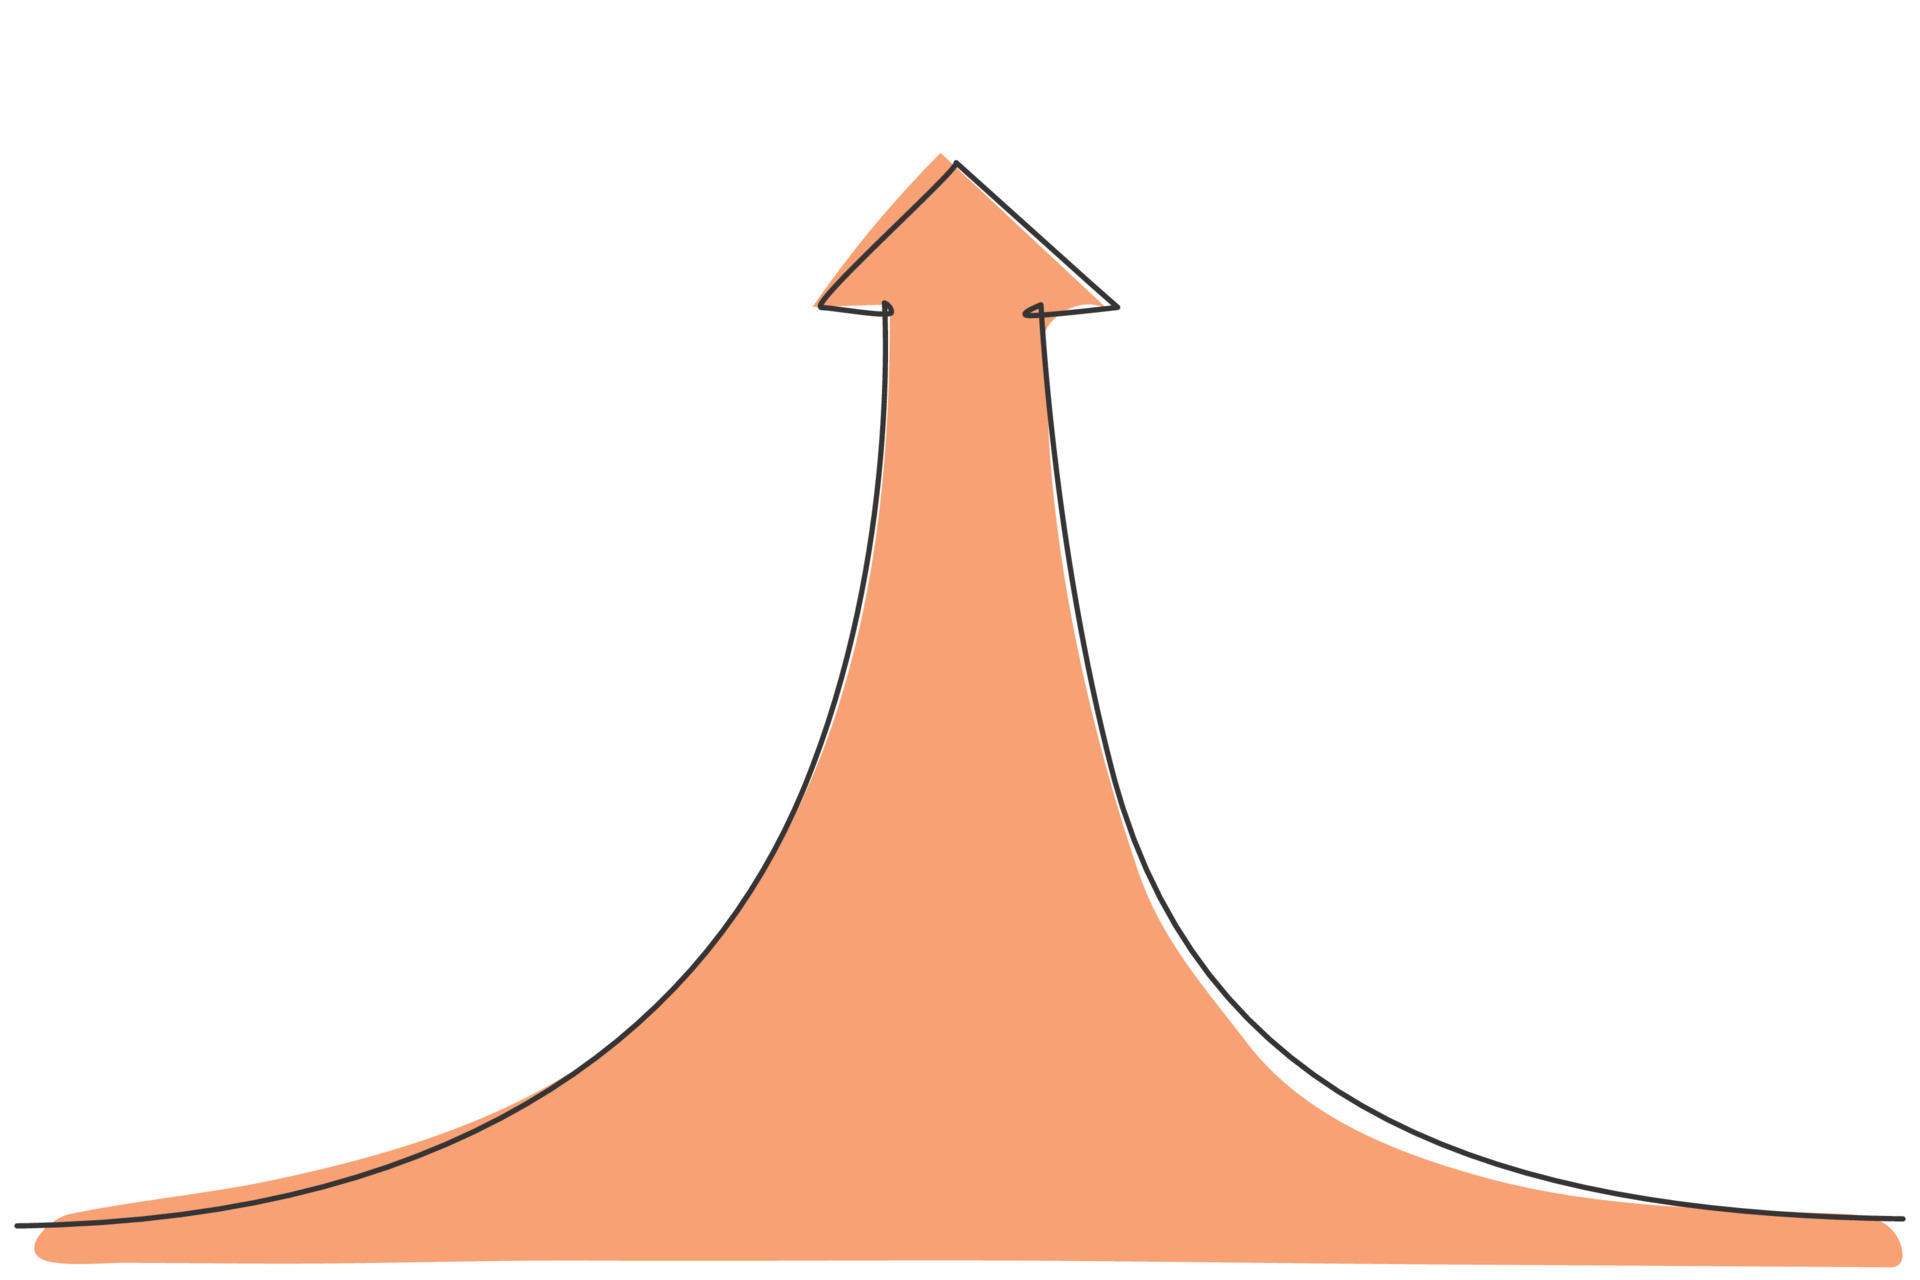

**Separating parameters with continuous values**

In [65]:
df.iloc[:, [0,2,4,6,7,8,12]]

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,0
295,55.0,1820,38,270000.00,1.2,139,0
296,45.0,2060,60,742000.00,0.8,138,0
297,45.0,2413,38,140000.00,1.4,140,0


**Creating dataframe from the separated parameters with continuous values**

In [81]:
df_reg = pd.DataFrame({'age': df['age'],'creatinine_phosphokinase': df['creatinine_phosphokinase'],'ejection_fraction': df['ejection_fraction'],'platelets': df['platelets'],'serum_creatinine': df['serum_creatinine'],'serum_sodium': df['serum_sodium'],'DEATH_EVENT': df['DEATH_EVENT']},)
df_reg

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,582,20,265000.00,1.9,130,1
1,55.0,7861,38,263358.03,1.1,136,1
2,65.0,146,20,162000.00,1.3,129,1
3,50.0,111,20,210000.00,1.9,137,1
4,65.0,160,20,327000.00,2.7,116,1
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,0
295,55.0,1820,38,270000.00,1.2,139,0
296,45.0,2060,60,742000.00,0.8,138,0
297,45.0,2413,38,140000.00,1.4,140,0


In [82]:
#Finding missing data
df_reg = pd.DataFrame(df_reg)
df_reg.isnull()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False


In [83]:
#Correlation
import matplotlib.pyplot as plt
corr = df_reg.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,0.253729
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,0.062728
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,-0.268603
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,-0.049139
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,0.294278
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,-0.195204
DEATH_EVENT,0.253729,0.062728,-0.268603,-0.049139,0.294278,-0.195204,1.000000


In [108]:
x1= df_reg.iloc[:, [0,1,2,4,5]].values  
y1= df_reg.iloc[:, 6].values  
#print(x)

In [109]:
from sklearn.model_selection import train_test_split  
x_train1, x_test1, y_train1, y_test1= train_test_split(x1, y1, test_size= 0.25, random_state=0) 

In [110]:
from sklearn.preprocessing import StandardScaler    
st_x1 = StandardScaler()    
x_train1 = st_x1.fit_transform(x_train1)    
x_test1= st_x1.transform(x_test1)  

**1D CNN**

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.regularizers import l2

model_reg = Sequential()

model_reg.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(x_train1.shape[1], 1)))
model_reg.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model_reg.add(Flatten())
model_reg.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.1)))
model_reg.add(Dense(units=1, activation='sigmoid'))

# compile the model
model_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save('model_reg.h5')
# train the model
history_reg = model_reg.fit(x_train1.reshape(x_train1.shape[0], x_train1.shape[1], 1), y_train1, epochs= 90, batch_size=16, verbose=1, validation_data=(x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1), y_test1))


Epoch 1/90
14/14 [==============================] - 1s 28ms/step - loss: 1.3556 - accuracy: 0.6920 - val_loss: 1.2990 - val_accuracy: 0.6400
Epoch 2/90
14/14 [==============================] - 0s 8ms/step - loss: 1.2254 - accuracy: 0.6920 - val_loss: 1.1835 - val_accuracy: 0.6400
Epoch 3/90
14/14 [==============================] - 0s 8ms/step - loss: 1.1109 - accuracy: 0.6920 - val_loss: 1.0880 - val_accuracy: 0.6400
Epoch 4/90
14/14 [==============================] - 0s 7ms/step - loss: 1.0188 - accuracy: 0.6920 - val_loss: 1.0131 - val_accuracy: 0.6400
Epoch 5/90
14/14 [==============================] - 0s 7ms/step - loss: 0.9417 - accuracy: 0.6920 - val_loss: 0.9486 - val_accuracy: 0.6400
Epoch 6/90
14/14 [==============================] - 0s 7ms/step - loss: 0.8773 - accuracy: 0.6920 - val_loss: 0.8932 - val_accuracy: 0.6400
Epoch 7/90
14/14 [==============================] - 0s 7ms/step - loss: 0.8227 - accuracy: 0.6920 - val_loss: 0.8453 - val_accuracy: 0.6400
Epoch 8/90
14/14 [=

In [119]:
train_results_CNN1 = model_reg.evaluate(x_train1.reshape(x_train1.shape[0], x_train1.shape[1], 1), y_train1, verbose=0)
test_results_CNN1 = model_reg.evaluate(x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1), y_test1, verbose=0)

# extract the loss and accuracy values
train_loss_CNN1 = train_results_CNN1[0]
train_acc_CNN1 = train_results_CNN1[1]
test_loss_CNN1 = test_results_CNN1[0]
test_acc_CNN1 = test_results_CNN1[1]

print("Train accuracy:", train_acc_CNN1)
print("Test accuracy:", test_acc_CNN1)

Train accuracy: 0.7946428656578064
Test accuracy: 0.7333333492279053


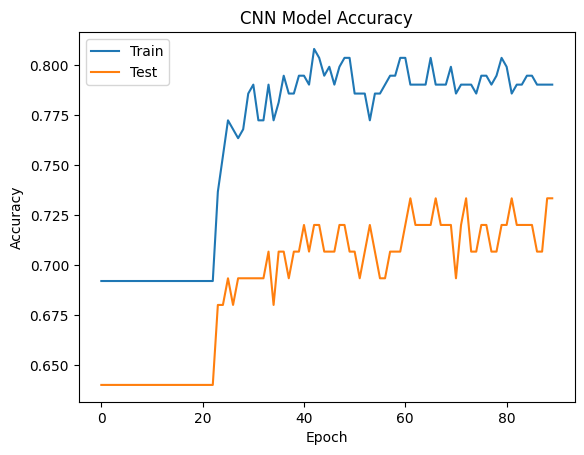

In [120]:
train_acc_CNN1 = history_reg.history['accuracy']
test_acc_CNN1 = history_reg.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_CNN1, label='Train')
plt.plot(test_acc_CNN1, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend()
plt.show()

**RNN**

In [127]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# define the RNN model
model_rnn_reg = Sequential()
model_rnn_reg.add(LSTM(64, input_shape=(x_train1.shape[1], 1)))
model_rnn_reg.add(Dense(1, activation='sigmoid'))

# compile the model
model_rnn_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_reg.save('model_reg.h5')
# train the model
history_rnn_reg = model_rnn_reg.fit(x_train1.reshape(x_train1.shape[0], x_train1.shape[1], 1), y_train1, epochs= 82, batch_size=32, validation_data=(x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1), y_test1))

Epoch 1/82
7/7 [==============================] - 6s 157ms/step - loss: 0.6898 - accuracy: 0.6116 - val_loss: 0.6847 - val_accuracy: 0.6400
Epoch 2/82
7/7 [==============================] - 0s 11ms/step - loss: 0.6776 - accuracy: 0.7009 - val_loss: 0.6752 - val_accuracy: 0.6267
Epoch 3/82
7/7 [==============================] - 0s 14ms/step - loss: 0.6642 - accuracy: 0.7009 - val_loss: 0.6652 - val_accuracy: 0.6267
Epoch 4/82
7/7 [==============================] - 0s 14ms/step - loss: 0.6496 - accuracy: 0.7009 - val_loss: 0.6533 - val_accuracy: 0.6267
Epoch 5/82
7/7 [==============================] - 0s 14ms/step - loss: 0.6286 - accuracy: 0.6964 - val_loss: 0.6431 - val_accuracy: 0.6400
Epoch 6/82
7/7 [==============================] - 0s 13ms/step - loss: 0.6116 - accuracy: 0.7009 - val_loss: 0.6376 - val_accuracy: 0.6267
Epoch 7/82
7/7 [==============================] - 0s 13ms/step - loss: 0.6010 - accuracy: 0.6964 - val_loss: 0.6449 - val_accuracy: 0.6400
Epoch 8/82
7/7 [==========

In [125]:
# evaluate the model
train_acc_rnn_reg = model_rnn_reg.evaluate(x_train1.reshape(x_train1.shape[0], x_train1.shape[1], 1), y_train1, verbose=0)[1]
test_acc_rnn_reg = model_rnn_reg.evaluate(x_test1.reshape(x_test1.shape[0], x_test1.shape[1], 1), y_test1, verbose=0)[1]
print("Train accuracy:", train_acc_rnn_reg)
print("Test accuracy :", test_acc_rnn_reg)

Train accuracy: 0.8080357313156128
Test accuracy : 0.6933333277702332


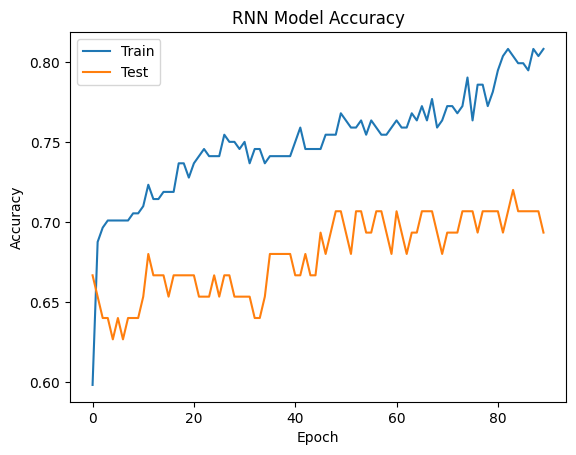

In [126]:
train_acc_rnn_reg = history_rnn_reg.history['accuracy']
test_acc_rnn_reg = history_rnn_reg.history['val_accuracy']
# plot the train and test accuracy
plt.plot(train_acc_rnn_reg, label='Train')
plt.plot(test_acc_rnn_reg, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()
plt.show()

**Evaaluation**

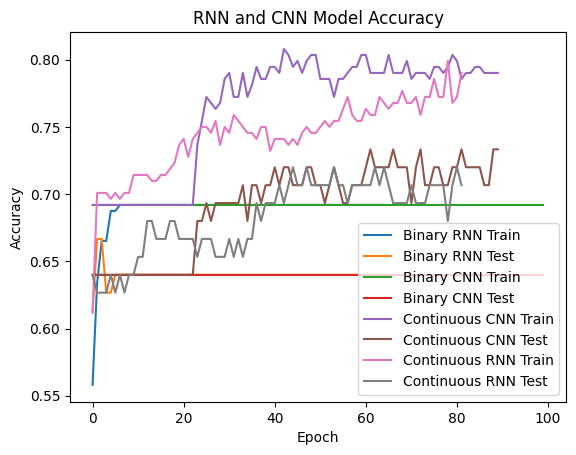

In [128]:
train_acc_rnn = history_rnn.history['accuracy']
test_acc_rnn = history_rnn.history['val_accuracy']

train_acc_CNN = history.history['accuracy']
test_acc_CNN = history.history['val_accuracy']

train_acc_CNN1 = history_reg.history['accuracy']
test_acc_CNN1 = history_reg.history['val_accuracy']

train_acc_rnn_reg = history_rnn_reg.history['accuracy']
test_acc_rnn_reg = history_rnn_reg.history['val_accuracy']

# plot the train and test accuracy
plt.plot(train_acc_rnn, label='Binary RNN Train')
plt.plot(test_acc_rnn, label='Binary RNN Test')
plt.plot(train_acc_CNN, label='Binary CNN Train')
plt.plot(test_acc_CNN, label='Binary CNN Test')

plt.plot(train_acc_CNN1, label='Continuous CNN Train')
plt.plot(test_acc_CNN1, label='Continuous CNN Test')
plt.plot(train_acc_rnn_reg, label='Continuous RNN Train')
plt.plot(test_acc_rnn_reg, label='Continuous RNN Test')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN and CNN Model Accuracy')
plt.legend()
plt.show()


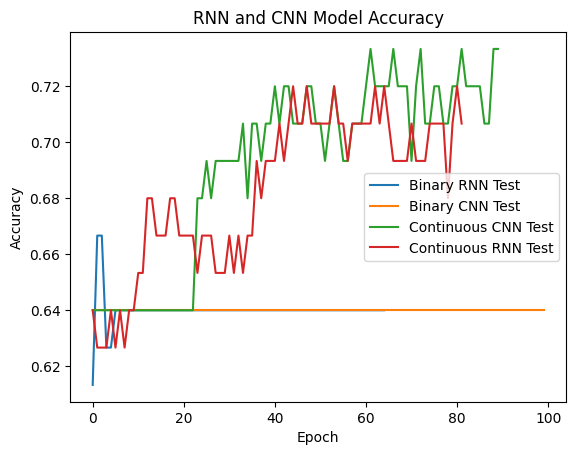

In [129]:
# plot the train and test accuracy
plt.plot(test_acc_rnn, label='Binary RNN Test')
plt.plot(test_acc_CNN, label='Binary CNN Test')
plt.plot(test_acc_CNN1, label='Continuous CNN Test')
plt.plot(test_acc_rnn_reg, label='Continuous RNN Test')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN and CNN Model Accuracy')
plt.legend()
plt.show()
